# T1.1

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

# Tema: Saúde

## SETUP

In [1]:
from IPython.display import display, Markdown, Latex
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import operator


In [3]:
# função de configuração de visualizações bar plot horizontais
def my_barh_plot(data, title, figsize=(10,5)):

    matplotlib.rcParams.update({'font.size': 14})

    fig, ax = plt.subplots(figsize=figsize)
    y_pos = [i for i in range(0,len(data))]
    x_values = list(data)
    ax.barh(y_pos, x_values, height=0.7)
    ax.set_title(title)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(data.index))
    plt.xlim((0,max(x_values)*1.2))
    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Use Y value as label and format number with one decimal place
        label = "{:}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(5, 5),              #  Shift label (horizontally,vertically)
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='left',                  # Horizontal label alignment
            va='top')                   # Vertical label alignment

    plt.show()

## BASES

Base desnutrição: https://data.worldbank.org/indicator/SN.ITK.DEFC.ZS

Base expectativa de vida: https://www.kaggle.com/amarpandey/world-life-expectancy-18002016#indicator-life_expectancy_at_birth.csv


Base de gasto com saúde: https://www.kaggle.com/angelmm/healthteethsugar#healthexpend.csv

## Pergunta 1:  Qual a média de destrunição dos países agrupados por rendimento?

In [11]:
dfHunger = pd.read_csv('datasets/hunger.csv')

In [12]:
dfHunger.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN,NaN
2,Angola,AGO,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN,NaN
3,Albania,ALB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN,NaN
4,Andorra,AND,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN,NaN
6,United Arab Emirates,ARE,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN,NaN
7,Argentina,ARG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN,NaN
8,Armenia,ARM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN,NaN
9,American Samoa,ASM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dfHunger.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997        

Criando um dicionário com os códigos de cada país e a porcentagem de desnutrição relativa ao pais

In [14]:
countryCodeHunger2016 = {}
for i in range(0, dfHunger.shape[0]):
    country_code = dfHunger.loc[i]["Country Code"]
    hungry2016 = dfHunger.loc[i]["2016"]
    if not numpy.isnan(hungry2016):
        countryCodeHunger2016[country_code] = hungry2016

In [15]:
countryCodeHunger2016

{'AFG': 30.3,
 'AGO': 23.9,
 'ALB': 5.5,
 'ARB': 12.051903242093301,
 'ARE': 2.5,
 'ARG': 3.8,
 'ARM': 4.3,
 'AUS': 2.5,
 'AUT': 2.5,
 'AZE': 2.5,
 'BEL': 2.5,
 'BEN': 10.4,
 'BFA': 21.3,
 'BGD': 15.2,
 'BGR': 3.0,
 'BIH': 2.5,
 'BLR': 2.5,
 'BLZ': 6.5,
 'BOL': 19.8,
 'BRA': 2.5,
 'BRB': 3.7,
 'BRN': 2.6,
 'BWA': 28.5,
 'CAF': 61.8,
 'CAN': 2.5,
 'CEB': 2.54898140473599,
 'CHE': 2.5,
 'CHL': 3.3,
 'CHN': 8.7,
 'CIV': 20.7,
 'CMR': 7.3,
 'COG': 37.5,
 'COL': 6.5,
 'CPV': 12.3,
 'CRI': 4.4,
 'CSS': 7.301093429660799,
 'CUB': 2.5,
 'CYP': 4.6,
 'CZE': 2.5,
 'DEU': 2.5,
 'DJI': 19.7,
 'DMA': 5.2,
 'DNK': 2.5,
 'DOM': 10.4,
 'DZA': 4.7,
 'EAP': 9.446782230696789,
 'EAR': 12.9873826032795,
 'EAS': 8.73129376362563,
 'ECA': 3.2373262947677004,
 'ECS': 2.83247400988108,
 'ECU': 7.8,
 'EGY': 4.8,
 'EMU': 2.5115618442283703,
 'ESP': 2.5,
 'EST': 2.8,
 'ETH': 21.4,
 'EUU': 2.51467488086654,
 'FCS': 26.1502685512885,
 'FIN': 2.5,
 'FJI': 4.4,
 'FRA': 2.5,
 'GAB': 9.4,
 'GBR': 2.5,
 'GEO': 7.4,
 'G

In [16]:
pdHunger_country_region_income = pd.read_csv('datasets/hunger_country_region_income.csv')

In [17]:
pdHunger_country_region_income.head(10)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba,NaN
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania,NaN
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra,NaN
5,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
6,ARE,Middle East & North Africa,High income,National Bureau of Statistics & Federal Compet...,United Arab Emirates,NaN
7,ARG,Latin America & Caribbean,High income,National Institute of Statistics and Census (I...,Argentina,NaN
8,ARM,Europe & Central Asia,Upper middle income,National Statistical Service of the Republic o...,Armenia,NaN
9,ASM,East Asia & Pacific,Upper middle income,BEA: https://www.bea.gov/national/gdp_territor...,American Samoa,NaN


In [18]:
dfHunger_country_region_income = pd.DataFrame(pdHunger_country_region_income)

In [19]:
dfHunger_country_region_income.loc[0]

Country Code                                                  ABW
Region                                  Latin America & Caribbean
IncomeGroup                                           High income
SpecialNotes    Central Bureau of Statistics and Central Bank ...
TableName                                                   Aruba
Unnamed: 5                                                    NaN
Name: 0, dtype: object

Criando um dicionário com os tipos de renda e a lista dos códigos dos países que tem essa renda

In [20]:
countrysIncome = {}
for i in range(0, dfHunger_country_region_income.shape[0]):
    income = dfHunger_country_region_income.loc[i]["IncomeGroup"]
    country_code = dfHunger_country_region_income.loc[i]["Country Code"]
    if income in countrysIncome:
        countrysIncome[income].append(country_code)
    else:
        countrysIncome[income] = []
        countrysIncome[income].append(country_code)

In [21]:
countrysIncome

{'High income': ['ABW',
  'AND',
  'ARE',
  'ARG',
  'ATG',
  'AUS',
  'AUT',
  'BEL',
  'BHR',
  'BHS',
  'BMU',
  'BRB',
  'BRN',
  'CAN',
  'CHE',
  'CHI',
  'CHL',
  'CUW',
  'CYM',
  'CYP',
  'CZE',
  'DEU',
  'DNK',
  'ESP',
  'EST',
  'FIN',
  'FRA',
  'FRO',
  'GBR',
  'GIB',
  'GRC',
  'GRL',
  'GUM',
  'HKG',
  'HRV',
  'HUN',
  'IMN',
  'IRL',
  'ISL',
  'ISR',
  'ITA',
  'JPN',
  'KNA',
  'KOR',
  'KWT',
  'LIE',
  'LTU',
  'LUX',
  'LVA',
  'MAC',
  'MAF',
  'MCO',
  'MLT',
  'MNP',
  'NCL',
  'NLD',
  'NOR',
  'NZL',
  'OMN',
  'PAN',
  'PLW',
  'POL',
  'PRI',
  'PRT',
  'PYF',
  'QAT',
  'SAU',
  'SGP',
  'SMR',
  'SVK',
  'SVN',
  'SWE',
  'SXM',
  'SYC',
  'TCA',
  'TTO',
  'URY',
  'USA',
  'VGB',
  'VIR'],
 'Low income': ['AFG',
  'BDI',
  'BEN',
  'BFA',
  'CAF',
  'COD',
  'COM',
  'ERI',
  'ETH',
  'GIN',
  'GMB',
  'GNB',
  'HTI',
  'LBR',
  'MDG',
  'MLI',
  'MOZ',
  'MWI',
  'NER',
  'NPL',
  'PRK',
  'RWA',
  'SEN',
  'SLE',
  'SOM',
  'SSD',
  'SYR',
  'TCD'

Contando a média da porcentagem de desnutrição por tipo de renda 

In [22]:
mediaHungry = {}
totalHungry = {}
for key in countrysIncome.keys():
    
    try:
        float(key)
        continue
    except ValueError:
        pass
        
    if key is not float:
        if key not in mediaHungry:
            mediaHungry[key] = 0
        if key not in totalHungry:
            totalHungry[key] = 0

        for country in countrysIncome[key]:
            if country in countryCodeHunger2016:
                mediaHungry[key] = mediaHungry[key] + countryCodeHunger2016[country]
                totalHungry[key] = totalHungry[key] + 1


In [23]:
mediaHungry

{'High income': 168.4,
 'Low income': 741.5000000000001,
 'Lower middle income': 595.2999999999998,
 'Upper middle income': 350.8000000000001}

In [24]:
totalHungry

{'High income': 51,
 'Low income': 26,
 'Lower middle income': 41,
 'Upper middle income': 47}

In [25]:
for key in mediaHungry.keys():
    mediaHungry[key] = mediaHungry[key]/totalHungry[key]
        

In [26]:
mediaHungry

{'High income': 3.3019607843137257,
 'Low income': 28.519230769230774,
 'Lower middle income': 14.519512195121948,
 'Upper middle income': 7.4638297872340456}

In [27]:
dfmediaHungry = pd.DataFrame(mediaHungry, index=[0])

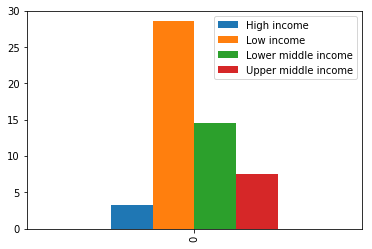

In [28]:
dfmediaHungry.plot.bar()
plt.show()

## Pergunta 2:  Quantas vezes cada país teve a maior expectativa de vida no mundo?

In [29]:
csvExpectancy = "indicator-life_expectancy_at_birth.csv"
dfExpectancy = pd.read_csv(csvExpectancy)

In [30]:
dfExpectancy.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.4,72.7,71.3,72.8,72.6,72.6,72.7,72.8,72.9,73.00
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.5,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80
7,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


Para cada ano somar 1 no pais que teve a maior expectativa de vida 

In [31]:
dictExpectancy = {}
for year in range(1800, 2006):
    country = dfExpectancy.loc[dfExpectancy[str(year)].idxmax()]["country"]
    if country in dictExpectancy:
        dictExpectancy[country] = dictExpectancy[country] + 1
    else:
        dictExpectancy[country] = 1

dictExpectancy

{'Iceland': 31,
 'Finland': 1,
 'Denmark': 13,
 'Norway': 90,
 'United Kingdom': 2,
 'Belgium': 1,
 'Sweden': 27,
 'Australia': 12,
 'Netherlands': 9,
 'Japan': 4,
 'Andorra': 16}

In [33]:
dfCountExpectancy = pd.DataFrame(dictExpectancy, index=[0])

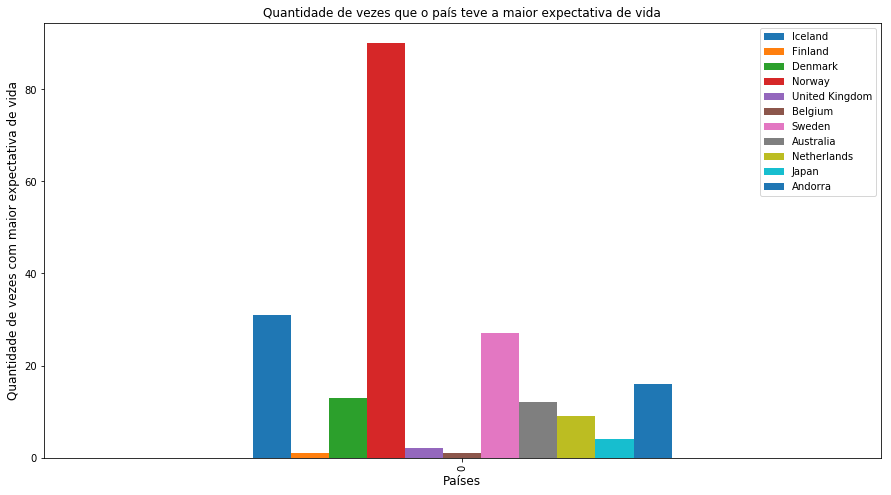

In [34]:
ax = dfCountExpectancy.plot(kind='bar', title ="Quantidade de vezes que o país teve a maior expectativa de vida", figsize=(15, 8))
ax.set_ylabel("Quantidade de vezes com maior expectativa de vida", fontsize=12)
ax.set_xlabel("Países", fontsize=12)
plt.show()

## Pergunta 3:  Qual a relação entre expectativa de vida e income? 

###### Juntando as bases e criando uma relação, considerando o ano de 2016:

In [40]:
dfHunger = pd.read_csv('datasets/hunger.csv')

In [41]:
dfHunger.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN,NaN
2,Angola,AGO,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN,NaN
3,Albania,ALB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN,NaN
4,Andorra,AND,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN,NaN
6,United Arab Emirates,ARE,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN,NaN
7,Argentina,ARG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN,NaN
8,Armenia,ARM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN,NaN
9,American Samoa,ASM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_hunger_income = pd.merge(dfHunger_country_region_income, dfHunger, on='Country Code')

In [64]:
df_hunger_income.head(10)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5,Country Name,Indicator Name,Indicator Code,1960,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba,NaN,Aruba,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan,NaN,Afghanistan,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola,NaN,Angola,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN,NaN
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania,NaN,Albania,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN,NaN
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra,NaN,Andorra,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN,Arab World,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN,NaN
6,ARE,Middle East & North Africa,High income,National Bureau of Statistics & Federal Compet...,United Arab Emirates,NaN,United Arab Emirates,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN,NaN
7,ARG,Latin America & Caribbean,High income,National Institute of Statistics and Census (I...,Argentina,NaN,Argentina,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN,NaN
8,ARM,Europe & Central Asia,Upper middle income,National Statistical Service of the Republic o...,Armenia,NaN,Armenia,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN,NaN
9,ASM,East Asia & Pacific,Upper middle income,BEA: https://www.bea.gov/national/gdp_territor...,American Samoa,NaN,American Samoa,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
for col in df_hunger_income.columns: 
    if col != "IncomeGroup" and col != "Country Name":
        del df_hunger_income[col]

In [69]:
df_hunger_income.head(10)

,IncomeGroup,Country Name
0,High income,Aruba
1,Low income,Afghanistan
2,Lower middle income,Angola
3,Upper middle income,Albania
4,High income,Andorra
5,NaN,Arab World
6,High income,United Arab Emirates
7,High income,Argentina
8,Upper middle income,Armenia
9,Upper middle income,American Samoa


In [70]:
df_hunger_income_expectancy = pd.merge(df_hunger_income, dfExpectancy, left_on='Country Name', right_on='country')

In [71]:
df_hunger_income_expectancy.head(10)

,IncomeGroup,Country Name,country,1800,1801,1802,1803,1804,1805,1806,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,High income,Aruba,Aruba,34.42,34.42,34.42,34.42,34.42,34.42,34.42,...,74.62,74.77,74.92,75.06,75.19,75.32,75.46,75.59,75.72,75.85
1,Low income,Afghanistan,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,...,52.40,52.80,53.30,53.60,54.00,54.40,54.80,54.90,53.80,52.72
2,Lower middle income,Angola,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.20,56.70,57.10,57.60,58.10,58.50,58.80,59.20,59.60,60.00
3,Upper middle income,Albania,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.60,76.80,77.00,77.20,77.40,77.50,77.70,77.90,78.00,78.10
4,High income,Andorra,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.50,84.60,84.60,84.70,84.70,84.70,84.80,84.80,84.80,84.80
5,High income,United Arab Emirates,United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,75.60,75.60,75.60,75.60,75.50,75.50,75.40,75.40,75.40,75.40
6,High income,Argentina,Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,75.20,75.40,75.60,75.80,76.00,76.10,76.20,76.30,76.50,76.70
7,Upper middle income,Armenia,Armenia,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,72.30,72.30,72.60,73.00,73.50,73.90,74.30,74.50,74.70,74.90
8,Upper middle income,American Samoa,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.40,72.70,71.30,72.80,72.60,72.60,72.70,72.80,72.90,73.00
9,High income,Antigua and Barbuda,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.30,75.50,75.70,75.80,75.90,76.10,76.20,76.30,76.40,76.50


In [90]:
df_hunger_income_expectancy = df_hunger_income_expectancy.rename(columns={'2016': 'doisMilEDezesseis'})

Text(0.5, 1.0, 'Income x Life expectancy')

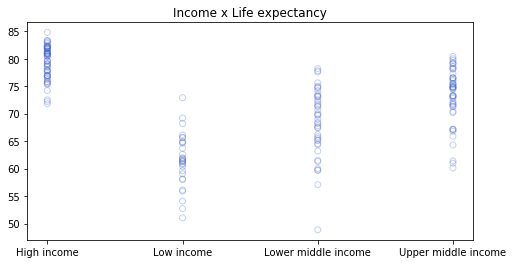

In [91]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.scatter(df_hunger_income_expectancy.IncomeGroup, df_hunger_income_expectancy.doisMilEDezesseis, alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('Income x Life expectancy')


# 4) Qual a relação entre desnutrição de expectativa de vida (2010 até 2016)

In [103]:
dfHunger_nutrition = dfHunger.dropna()
for col in dfHunger_nutrition.columns: 
    if col != "2016" and col != "Country Name":
        del dfHunger_nutrition[col]


In [104]:
dfHunger_nutrition

,Country Name,2016
1,Afghanistan,30.300000
2,Angola,23.900000
3,Albania,5.500000
5,Arab World,12.051903
6,United Arab Emirates,2.500000
7,Argentina,3.800000
8,Armenia,4.300000
11,Australia,2.500000
12,Austria,2.500000
13,Azerbaijan,2.500000


In [105]:
dfHunger_nutrition = dfHunger_nutrition.rename(columns={'2016': 'doisMilEDezesseisNutrition'})

In [106]:
dfHunger_nutrition

,Country Name,doisMilEDezesseisNutrition
1,Afghanistan,30.300000
2,Angola,23.900000
3,Albania,5.500000
5,Arab World,12.051903
6,United Arab Emirates,2.500000
7,Argentina,3.800000
8,Armenia,4.300000
11,Australia,2.500000
12,Austria,2.500000
13,Azerbaijan,2.500000


In [107]:
df_hunger_nutrition_expectancy = pd.merge(dfHunger_nutrition, dfExpectancy, left_on='Country Name', right_on='country').dropna()

In [108]:
df_hunger_nutrition_expectancy

,Country Name,doisMilEDezesseisNutrition,country,1800,1801,1802,1803,1804,1805,1806,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,30.3,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
1,Angola,23.9,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
2,Albania,5.5,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
3,United Arab Emirates,2.5,United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,75.6,75.6,75.6,75.6,75.5,75.5,75.4,75.4,75.4,75.40
4,Argentina,3.8,Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,75.2,75.4,75.6,75.8,76.0,76.1,76.2,76.3,76.5,76.70
5,Armenia,4.3,Armenia,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,72.3,72.3,72.6,73.0,73.5,73.9,74.3,74.5,74.7,74.90
6,Australia,2.5,Australia,34.05,34.05,34.05,34.05,34.05,34.05,34.05,...,81.5,81.6,81.8,82.0,82.2,82.4,82.4,82.3,82.3,82.30
7,Austria,2.5,Austria,34.40,34.40,34.40,34.40,34.40,34.40,34.40,...,80.1,80.4,80.3,80.5,80.7,80.9,81.1,81.2,81.3,81.40
8,Azerbaijan,2.5,Azerbaijan,29.17,29.17,29.17,29.17,29.17,29.17,29.17,...,69.1,69.2,69.7,70.1,70.8,71.5,72.1,72.5,72.9,73.30
9,Belgium,2.5,Belgium,40.00,40.01,40.02,40.02,40.03,40.04,40.05,...,79.5,79.6,79.8,80.1,80.2,80.3,80.4,80.5,80.5,80.50


In [109]:
df_hunger_nutrition_expectancy = df_hunger_nutrition_expectancy.rename(columns={'2016': 'doisMilEDezesseisExpectancy'})

In [110]:
df_hunger_nutrition_expectancy

,Country Name,doisMilEDezesseisNutrition,country,1800,1801,1802,1803,1804,1805,1806,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,doisMilEDezesseisExpectancy
0,Afghanistan,30.3,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
1,Angola,23.9,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
2,Albania,5.5,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
3,United Arab Emirates,2.5,United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,75.6,75.6,75.6,75.6,75.5,75.5,75.4,75.4,75.4,75.40
4,Argentina,3.8,Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,75.2,75.4,75.6,75.8,76.0,76.1,76.2,76.3,76.5,76.70
5,Armenia,4.3,Armenia,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,72.3,72.3,72.6,73.0,73.5,73.9,74.3,74.5,74.7,74.90
6,Australia,2.5,Australia,34.05,34.05,34.05,34.05,34.05,34.05,34.05,...,81.5,81.6,81.8,82.0,82.2,82.4,82.4,82.3,82.3,82.30
7,Austria,2.5,Austria,34.40,34.40,34.40,34.40,34.40,34.40,34.40,...,80.1,80.4,80.3,80.5,80.7,80.9,81.1,81.2,81.3,81.40
8,Azerbaijan,2.5,Azerbaijan,29.17,29.17,29.17,29.17,29.17,29.17,29.17,...,69.1,69.2,69.7,70.1,70.8,71.5,72.1,72.5,72.9,73.30
9,Belgium,2.5,Belgium,40.00,40.01,40.02,40.02,40.03,40.04,40.05,...,79.5,79.6,79.8,80.1,80.2,80.3,80.4,80.5,80.5,80.50


Text(0.5, 1.0, 'Desnutrição x Expectativa de vida')

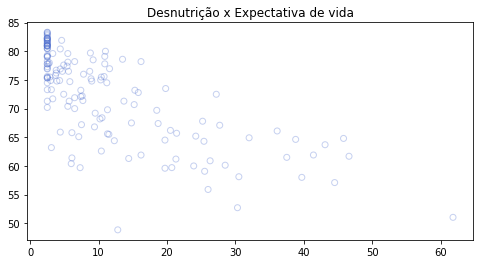

In [112]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.scatter(df_hunger_nutrition_expectancy.doisMilEDezesseisNutrition, df_hunger_nutrition_expectancy.doisMilEDezesseisExpectancy, alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('Desnutrição x Expectativa de vida')

# 5) Qual a relação entre Expectativa de vida e gasto do governo com a saúde no Brasil ?

Vamos utilizar a base de quanto cada governo gasta com saúde: https://www.kaggle.com/angelmm/healthteethsugar#healthexpend.csv

In [56]:
df_health_expend = pd.read_csv('datasets/healthexpend.csv')

In [57]:
df_health_expend.head(10)

,Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820706,143.160577,138.840923
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,897.181541,982.794819,966.484960,1338.295221,942.421563,862.391612,889.589911,1022.332657,1297.395724,1517.211905,1628.698412,1853.281652,2102.019346,2369.684492,2357.761806,2172.379162
7,Angola,13.516833,8.724155,10.527305,6.648744,6.548254,12.514473,18.320510,14.311165,19.364537,19.664783,27.121077,50.848735,68.385205,125.545110,180.914189,101.591527
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,233.093441,227.111427,245.814244,263.587486,277.832613,281.392962,265.678108,266.949412,278.509762,290.616312,304.669749,350.984695,396.555105,408.585690,403.158318,489.455700


In [58]:
df_health_expend = df_health_expend.rename(columns={'Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..': 'PerCapitaCountry'})

In [59]:
df_health_expend.head(10)

,PerCapitaCountry,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820706,143.160577,138.840923
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,897.181541,982.794819,966.484960,1338.295221,942.421563,862.391612,889.589911,1022.332657,1297.395724,1517.211905,1628.698412,1853.281652,2102.019346,2369.684492,2357.761806,2172.379162
7,Angola,13.516833,8.724155,10.527305,6.648744,6.548254,12.514473,18.320510,14.311165,19.364537,19.664783,27.121077,50.848735,68.385205,125.545110,180.914189,101.591527
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,233.093441,227.111427,245.814244,263.587486,277.832613,281.392962,265.678108,266.949412,278.509762,290.616312,304.669749,350.984695,396.555105,408.585690,403.158318,489.455700


In [140]:
df_health_expend_Brazil = df_health_expend.loc[df_health_expend['PerCapitaCountry'].isin(['Brazil'])]

In [141]:
df_health_expend_Brazil

,PerCapitaCountry,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
29,Brazil,135.900298,141.870908,152.67535,143.057917,103.402,106.753682,96.301297,90.662876,94.77184,121.043907,155.551585,204.988096,255.086881,305.735742,319.844706,465.67404


Temos os dados de gasto com a saúde entre 1995 e 2010, agora vamos pegar os dados de expectativa de vida entre esses anos

In [142]:
df_expectancy_Brazil = dfExpectancy.loc[dfExpectancy['country'].isin(['Brazil'])]

In [143]:
df_expectancy_Brazil

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
29,Brazil,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,73.0,73.2,73.4,73.6,73.8,74.0,74.1,74.3,74.4,74.5


In [144]:
for col in df_expectancy_Brazil.columns: 
    if col != "country" and col != "1995" and col != "1996" and col != "1997" and col != "1998" and col != "1999" and col != "2000" and col != "2001" and col != "2002" and col != "2003" and col != "2004" and col != "2005" and col != "2006":
        del df_expectancy_Brazil[col]

In [145]:
df_expectancy_Brazil

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
29,Brazil,69.0,69.3,69.6,69.9,70.3,70.7,71.1,71.4,71.7,72.0,72.4,72.7


Agora vamos remover a coluna "country" dos dois data frames para conseguir fazer o gráfico correto

In [146]:
del df_health_expend_Brazil['PerCapitaCountry']

In [147]:
df_health_expend_Brazil

,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
29,135.900298,141.870908,152.67535,143.057917,103.402,106.753682,96.301297,90.662876,94.77184,121.043907,155.551585,204.988096,255.086881,305.735742,319.844706,465.67404


In [148]:
del df_expectancy_Brazil['country']

In [149]:
df_expectancy_Brazil

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
29,69.0,69.3,69.6,69.9,70.3,70.7,71.1,71.4,71.7,72.0,72.4,72.7


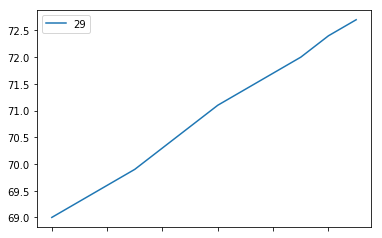

In [150]:
df_expectancy_Brazil.T.plot.line()

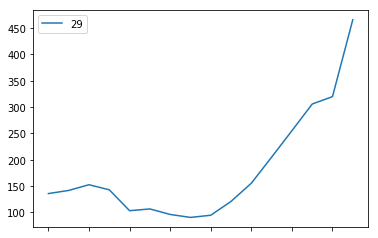

In [151]:
df_health_expend_Brazil.T.plot.line()

Conclusão: o aumenta de expectativa de vida no Brasil não teve relação direta com o quando o governo gastou com saúde. 

# 6) Quais são os 10 países que mais gastaram com saúde em 2006? E quais os que menos gastaram? Existem países comuns com os 10 que tem a maior expectativa de vida e com os que tem menos expectativa de vida?

In [152]:
df_health_expend.head(10)

,PerCapitaCountry,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820706,143.160577,138.840923
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,897.181541,982.794819,966.484960,1338.295221,942.421563,862.391612,889.589911,1022.332657,1297.395724,1517.211905,1628.698412,1853.281652,2102.019346,2369.684492,2357.761806,2172.379162
7,Angola,13.516833,8.724155,10.527305,6.648744,6.548254,12.514473,18.320510,14.311165,19.364537,19.664783,27.121077,50.848735,68.385205,125.545110,180.914189,101.591527
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,233.093441,227.111427,245.814244,263.587486,277.832613,281.392962,265.678108,266.949412,278.509762,290.616312,304.669749,350.984695,396.555105,408.585690,403.158318,489.455700


In [154]:
df_health_expend.sort_values(by=['X2006'], ascending=False)

,PerCapitaCountry,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
130,Luxembourg,2602.905554,2608.045422,2285.020950,2387.171385,2574.744535,2955.015079,2854.167202,3577.409878,4168.272582,5179.522690,5464.803230,5944.163061,6414.460517,6770.178177,6942.290108,6905.530344
169,Norway,2506.679137,2573.073006,2453.141980,2593.120600,2745.125977,2603.035363,2785.236665,3455.977031,4132.797737,4542.518377,4962.985986,5234.250633,6149.787313,6803.230155,6334.996177,6788.388756
147,Monaco,2576.385274,2478.922658,2348.546046,2327.984122,2456.371134,2120.715908,2170.479974,2400.013048,3443.759276,4047.641080,4228.139750,4350.907024,4913.326159,5869.560715,5857.177066,5569.664754
59,Denmark,2333.210858,2372.069124,2162.725329,2192.235623,2457.316591,2187.759216,2294.812253,2550.329852,3171.551616,3692.805630,3924.454507,4238.812169,4800.050817,5390.313138,5486.623435,5465.086052
100,Iceland,1867.005052,1900.572326,2249.871384,2251.637271,2674.539584,2472.918087,2176.259761,2657.869951,3301.293869,3714.654742,4346.963100,4236.161679,5120.754384,4117.228351,3039.101493,3003.527697
219,Switzerland,2287.440129,2324.082571,2033.813289,2104.560598,2105.323261,1950.616538,2110.101008,2390.604461,2882.586789,3213.200029,3313.134690,3292.756151,3586.185573,4164.219680,4290.425840,4610.774610
218,Sweden,1983.369454,2229.035462,1971.455075,2003.741972,2053.305977,1935.180766,1837.134334,2112.830606,2682.286646,2977.233844,3018.049137,3190.283223,3667.941643,3966.023203,3542.782415,3820.116794
240,United States,1683.124404,1753.840100,1811.228438,1843.058284,1916.391915,2031.765381,2231.182833,2404.820625,2608.070980,2785.602950,2953.582404,3174.434494,3356.070268,3554.238744,3794.852087,4436.607049
76,France,2183.163842,2177.602013,1939.578735,1973.643610,1947.876436,1748.609613,1773.692979,1982.937364,2493.046782,2861.502206,2983.865931,3108.358127,3511.865073,3839.004847,3771.881595,3651.849006
157,Netherlands,1603.209373,1462.944309,1334.992113,1325.999097,1320.132647,1214.056076,1301.484480,1502.176845,1983.622893,2234.858951,2326.799495,3049.457386,3478.576893,3943.438724,4545.568622,4431.118412


Países que mais gastaram com saúde em 2006:<br>
1 - Luxembourg<br>
2 - Norway<br>
3 - Monaco<br>
4 - Denmark<br>
5 - Iceland<br>
6 - Switzerland<br>
7 - Sweden<br>
8 - United States<br>
9 - France<br>
10 - Netherlands<br>

In [155]:
df_health_expend.sort_values(by=['X2006'])

,PerCapitaCountry,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
153,Myanmar,0.490000,0.400000,0.280000,0.200000,0.270000,0.450000,0.310000,0.460000,0.490000,0.667165,0.460000,0.835616,0.881911,1.175058,1.618811,2.087651
92,Guinea,5.534964,5.239171,5.335285,4.195757,4.351057,3.934016,4.307162,4.563500,5.231603,3.704774,1.832628,2.157510,1.825460,3.603371,2.057082,2.597111
49,"Congo, Dem. Rep.",0.190000,0.140000,0.270000,0.230000,0.659229,0.543459,0.310000,0.270000,1.156048,1.415967,2.195193,2.782327,3.697467,6.455438,7.479580,6.698760
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
122,Lao,9.107090,10.198511,12.727378,6.957119,3.211108,3.795767,3.612111,3.463903,4.585972,3.362174,2.583586,3.107705,3.306566,9.555449,11.061805,15.367497
126,Liberia,NaN,NaN,NaN,2.030018,2.486196,2.634082,2.859168,1.917695,1.564828,1.955153,2.666803,3.370542,5.883027,9.066860,9.663518,9.487250
93,Guinea-Bissau,6.313307,6.148994,5.369399,3.817646,2.690592,1.739108,1.491152,3.962860,4.696371,3.387951,3.741304,3.646600,4.443135,5.071975,5.085110,4.701511
68,Eritrea,4.040023,2.892091,3.838657,4.026141,3.885471,4.328460,4.828872,3.676952,3.634253,3.780689,3.601114,3.833440,4.093368,5.388028,5.091385,5.741680
203,Sierra Leone,3.015136,3.179874,3.301371,2.112831,3.053511,3.175882,3.994731,4.478912,4.731125,3.197684,4.380209,4.007118,2.820826,4.582179,4.746743,4.816956
71,Ethiopia,1.598522,1.610600,1.799614,1.987307,2.101240,2.848136,3.229937,2.864625,3.430057,3.426517,4.142908,4.605636,6.695665,7.287267,8.327165,8.413698


Países que menos gastaram com saúde em 2006:<br>
1 - Myanmar<br>
2 - Guinea<br>
3 - Congo, Dem. Rep.<br>
4 - Afghanistan<br>
5 - Lao<br>
6 - Liberia<br>
7 - Guinea-Bissau<br>
8 - Eritrea<br>
9 - Sierra Leone<br>
10 - Ethiopia<br>

In [158]:
dfExpectancy.sort_values(by=['2006'], ascending=False)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.50,84.60,84.60,84.70,84.70,84.70,84.80,84.80,84.80,84.80
110,Japan,36.40,36.40,36.40,36.40,36.40,36.40,36.40,36.40,36.40,...,82.40,82.50,82.70,82.70,82.60,82.90,83.00,83.10,83.20,83.30
98,"Hong Kong, China",34.90,34.90,34.90,34.90,34.90,34.90,34.90,34.90,34.90,...,82.31,82.49,82.66,82.84,83.02,83.20,83.38,83.56,83.73,83.90
100,Iceland,42.85,33.88,27.62,19.60,24.76,30.85,45.82,43.56,43.55,...,82.10,82.40,82.50,82.80,82.90,83.10,83.20,83.30,83.30,83.30
219,Switzerland,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,...,81.70,82.00,82.00,82.30,82.60,82.70,82.80,82.90,83.00,83.10
13,Australia,34.05,34.05,34.05,34.05,34.05,34.05,34.05,34.05,34.05,...,81.50,81.60,81.80,82.00,82.20,82.40,82.40,82.30,82.30,82.30
108,Italy,29.69,29.69,29.69,29.69,29.69,29.69,29.69,29.69,29.69,...,81.30,81.50,81.60,81.90,82.00,82.00,82.10,82.10,82.20,82.30
138,Malta,28.70,28.70,28.70,28.70,28.70,28.70,28.70,28.70,28.70,...,80.90,80.70,81.20,81.30,81.30,81.60,81.70,82.00,82.10,82.20
218,Sweden,32.16,36.90,40.20,40.28,39.70,41.05,36.17,38.76,30.15,...,80.90,81.10,81.20,81.60,81.70,81.80,81.90,82.10,82.10,82.10
212,Spain,29.50,29.50,29.50,29.50,29.50,29.50,29.50,29.50,29.50,...,80.80,81.10,81.50,81.80,82.00,82.20,82.50,82.50,82.60,82.70


Países com a maior expectativa de vida 2006:<br>
1 - Andorra<br>
2 - Japan<br>
3 - Hong Kong, China<br>
4 - Iceland<br>
5 - Switzerland<br>
6 - Australia<br>
7 - Italy<br>
8 - Malta<br>
9 - Sweden<br>
10 - Spain<br>

In [163]:
dfExpectancy.sort_values(by=['2006'])

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
217,Swaziland,32.30,32.30,32.30,32.30,32.30,32.30,32.30,32.30,32.30,...,44.3,45.1,45.9,46.4,48.0,49.1,49.4,49.8,51.8,53.88
125,Lesotho,32.80,32.80,32.80,32.80,32.80,32.80,32.80,32.80,32.80,...,43.3,44.5,45.5,46.4,46.7,46.1,45.6,45.4,47.1,48.86
257,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69
40,Central African Republic,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,...,46.2,46.8,47.6,47.9,48.1,48.5,47.8,48.2,49.6,51.04
256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
134,Malawi,30.30,30.30,30.30,30.30,30.30,30.30,30.30,30.30,30.30,...,51.0,52.4,53.9,55.4,56.6,58.0,59.3,60.1,60.5,60.90
28,Botswana,33.60,33.60,33.60,33.60,33.60,33.60,33.60,33.60,33.60,...,52.4,53.2,54.3,55.6,56.5,56.5,56.9,57.3,58.7,60.13
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
208,Somalia,29.40,29.40,29.40,29.40,29.40,29.40,29.40,29.40,29.40,...,52.4,52.6,52.8,51.6,52.0,53.4,54.1,54.3,54.2,54.10
210,South Africa,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,...,53.0,53.4,53.9,54.9,56.6,59.0,60.7,61.2,61.3,61.40


Países com a menor expectativa de vida 2006:<br>
1 - Swaziland<br>
2 - Lesotho<br>
3 - Zimbabwe<br>
4 - Iceland<br>
5 - Switzerland<br>
6 - Australia<br>
7 - Italy<br>
8 - Malta<br>
9 - Sweden<br>
10 - Spain<br>